# Correlation and Autocorrelation in Time Series

## Introduction

In this lecture, we'll look at correlation,  autocorrelation and partial autocorrelation in time series. 

## Objectives

You will be able to:
- Describe correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## Correlated Time Series

As you've seen before, correlation is a statistical technique that shows whether and how strongly pairs of variables are related to each other. For correlated variables, you've seen that the Pearson correlation coefficient can be used to summarize the correlation between the variables.

Knowing this, it's no surprise that time series can be correlated as well. To introduce the concept of correlated time series, we use a data set also used in this [blog post](https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial) on www.datacamp.com. The data set contains Google Trends data of three keywords: Diet, Gym and Finance. Let's visualize this time series data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
gtrends  =  pd.read_csv('google_trends.csv', skiprows=1)
gtrends.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,47
1,2004-02,77,27,49
2,2004-03,75,25,47
3,2004-04,73,24,47
4,2004-05,75,23,44


In [31]:
gtrends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 4 columns):
Month                   179 non-null object
diet: (Worldwide)       179 non-null int64
gym: (Worldwide)        179 non-null int64
finance: (Worldwide)    179 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.7+ KB


In [32]:
gtrends.columns = ['Month', 'Diet', 'Gym', 'Finance']
gtrends.Month = pd.to_datetime(gtrends.Month) # convert month column to datetime
gtrends.set_index('Month', inplace=True)
gtrends.head()

,Diet,Gym,Finance
Month,,,
2004-01-01,100,31,47
2004-02-01,77,27,49
2004-03-01,75,25,47
2004-04-01,73,24,47
2004-05-01,75,23,44


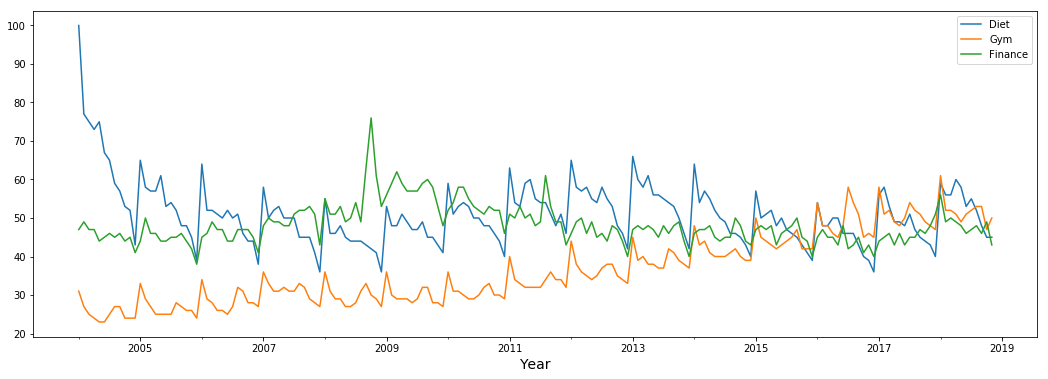

In [33]:
gtrends.plot(figsize=(18,6))
plt.xlabel('Year', fontsize=14);

These time series seem to exhibit some seasonality as well. Do you see what's happening? Especially for "Diet" and "Gym" there seems to be a peak in the beginning of each year. The famous New Year's Resolutions!

Not surprisingly, these two seem to move in similar directions at same times as well. We can use the .corr-function 


In [34]:
gtrends.corr()

,Diet,Gym,Finance
Diet,1.000000,-0.050934,-0.026604
Gym,-0.050934,1.000000,-0.223186
Finance,-0.026604,-0.223186,1.000000


In [42]:
gtrends.index

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01',
               ...
               '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
               '2018-10-01', '2018-11-01'],
              dtype='datetime64[ns]', name='Month', length=179, freq=None)

Interestingly, The correlations do not seem to be big, and have negative signs. But when we look at the plots, there is clearly some similar movements. What are we doing wrong?

Remember how we said that we want to make our time series **stationary**? This is where you can show off your detrending skills! Turns out you can more easily find out if time series are correlated if you **detrend** them first. Let's use differencing to detrend these time series and then calculate the correlation again!

In [41]:
gtrends_diff = gtrends.diff(periods=1) # subtract 1 from your default period

In [37]:
gtrends_diff.head()

,Diet,Gym,Finance
Month,,,
2004-01-01,NaN,NaN,NaN
2004-02-01,-23.0,-4.0,2.0
2004-03-01,-2.0,-2.0,-2.0
2004-04-01,-2.0,-1.0,0.0
2004-05-01,2.0,-1.0,-3.0


In [38]:
gtrends_diff.corr()

,Diet,Gym,Finance
Diet,1.000000,0.793339,0.395105
Gym,0.793339,1.000000,0.341564
Finance,0.395105,0.341564,1.000000


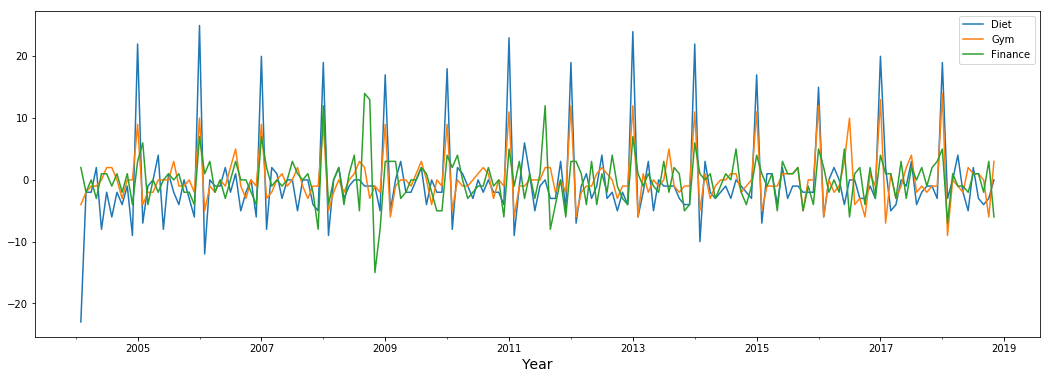

In [40]:
gtrends_diff.plot(figsize=(18,6))
plt.xlabel('Year', fontsize=14);

In [8]:
gtrends_diff.corr()

,Diet,Gym,Finance
Diet,1.000000,0.793339,0.395105
Gym,0.793339,1.000000,0.341564
Finance,0.395105,0.341564,1.000000


So how did this happen? The spikes at the beginning of the year are a form of **seasonality**. By using 1-lag differencing you eliminated the simple trend, without getting rid of the seasonality. The trend "confused" the correlation coefficient, but after differencing, the correlation is very apparent.

## Autocorrelation

Autocorrelation is a very powerful tool for time series analysis. it helps us study how each time series observation is related to its recent (or not so recent) past. processes with greater autocorrelation are more predictable than those without any form of autocorrelation.

Let's start with comparing the time series of the keyword "Diet", with the time series with a lag of one. What you're essentially doing, is your comparing each value in the time series, with yesterday's value (or in case of the "Diet" series, with the value in the previous month. This is called "lag 1 autocorrelation".

You can use the `.shift` function in pandas to shift the index forward, or backward.

In [53]:
diet = gtrends[['Diet']]
diet.head()

,Diet
Month,
2004-01-01,100
2004-02-01,77
2004-03-01,75
2004-04-01,73
2004-05-01,75


In [56]:
diet_shift_1 = diet.shift(periods=1)
diet_shift_1.rename(columns={"Diet":"Diet_1"}, inplace=True)
diet_shift_1.head()

,Diet_1
Month,
2004-01-01,NaN
2004-02-01,100.0
2004-03-01,77.0
2004-04-01,75.0
2004-05-01,73.0


In [57]:
lag_1= pd.concat([diet_shift_1, diet], axis=1)
lag_1.head()

,Diet_1,Diet
Month,,
2004-01-01,NaN,100
2004-02-01,100.0,77
2004-03-01,77.0,75
2004-04-01,75.0,73
2004-05-01,73.0,75


In [58]:
lag_1.corr()

,Diet_1,Diet
Diet_1,1.000000,0.624862
Diet,0.624862,1.000000


Let's plot them together to get a sense of what's happening

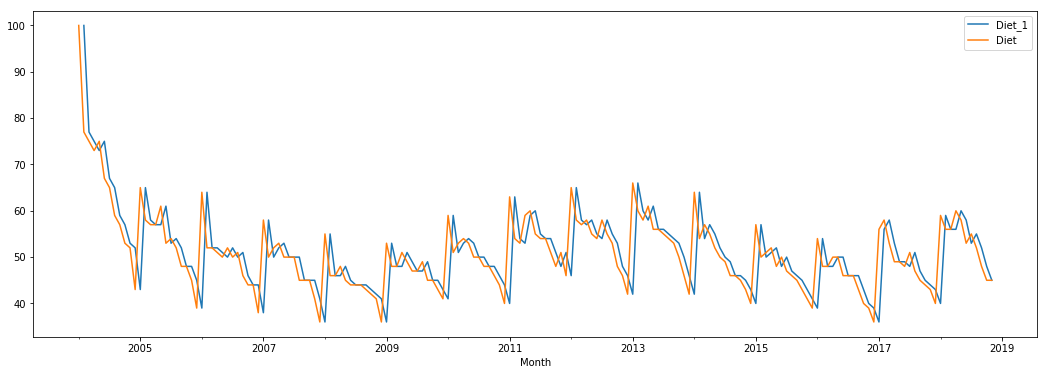

In [59]:
lag_1.plot(figsize=(18,6))

You can see that the "lag 1 autocorrelation" is 0.62. Let's look at lag 2:

In [60]:
diet_shift_2 = diet.shift(periods=2)
diet_shift_2.rename(columns={"Diet":"Diet_2"}, inplace=True)
lag_2= pd.concat([diet_shift_2, diet], axis=1)

lag_2.corr()

,Diet_2,Diet
Diet_2,1.000000,0.537913
Diet,0.537913,1.000000


The "lag 2 autocorrelation" is 0.54, so a little lower than the "lag 1 autocorrelation".

Now, how about a lag 12 autocorrelation?

In [61]:
diet_shift_12 = diet.shift(periods=12)
diet_shift_12.rename(columns={"Diet":"Diet_12"}, inplace=True)


lag_12= pd.concat([diet_shift_12, diet], axis=1)

lag_12.corr()

,Diet_12,Diet
Diet_12,1.000000,0.754955
Diet,0.754955,1.000000


Unsurprisingly, this autocorrelation is high! We're basically comparing the series shifting our data 1 year, so january 2004 is compared to january 2005, and so on. Let's visualize these series and the 12-lag shifted series as well.

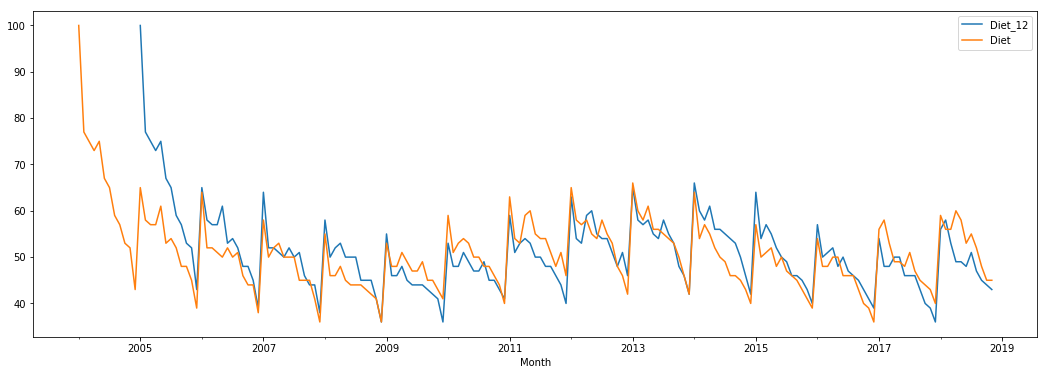

In [62]:
lag_12.plot(figsize=(18,6))

## The Autocorrelation Function

Great, but wouldn't it be nice to get a summary of the autocorrelations for each lag? Well, that's exactly what the **autocorrelation function** (often abbreviated to ACF) does. The autocorrelation function is a function that represents autocorrelation of a time series as a function of the time lag.

The correlation function tells interesting stories about trends and seasonality. For example, if the original time series repeats itself every five days, you would expect to see a spike in the autocorrelation function at 5 days.

Creating an autocorrelation function for our "Diet" series, we you have the lag on the x-axis and the correlation value for each respective lag value on the y-axis. 

You can use the `autocorrelation_plot` function in Pandas' `plotting` module.

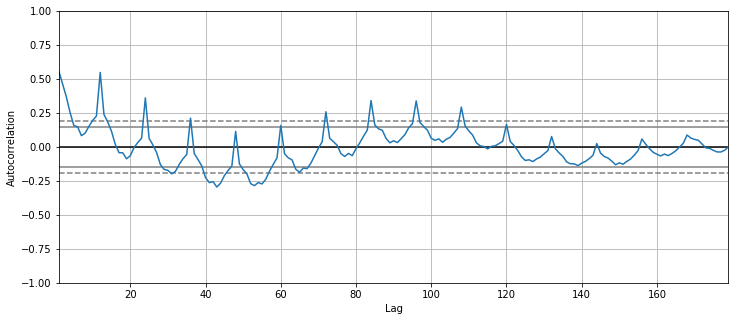

In [63]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(diet);

Look at that, you can clearly identify spikes for lags of multiples of 12. However, The dotted lines in the plot tell you about the statistical significance of the correlation. For these time series, you can say that 'Diet' is definitely autocorrelated for lags of twelve months and 24 months, but for some later lags the result is not significant.

Like before, instead of plotting the autocorrelation function for the "Diet" series as is, we can also plot the autocorrelation function for the differenced series. Let's see how that changes our result.

In [64]:
diet_diff = gtrends_diff[["Diet"]].dropna()

In [66]:
diet_diff.head()

,Diet
Month,
2004-02-01,-23.0
2004-03-01,-2.0
2004-04-01,-2.0
2004-05-01,2.0
2004-06-01,-8.0


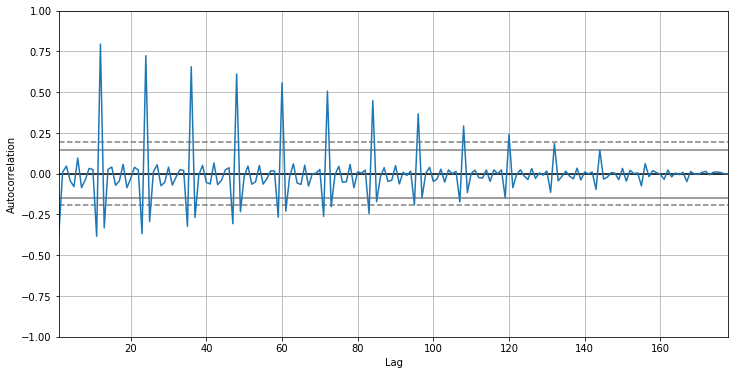

In [67]:
plt.figure(figsize=(12,6))
pd.plotting.autocorrelation_plot(diet_diff)

You can see that the ACF here seems a little more *stable*, revolving around 0, which is no surprise. Additionally, the autocorrelation for multiples of 12 seems concistently statistically significant, while it decays for longer time lags!

## The Partial Autocorrelation Function

Similarly to the Autocorrelation Function, the **Partial Autocorrelation Function** (or PACF) gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. It contrasts with the autocorrelation function, which does not control for other lags. PACF can be thought of as a summary of the relationship between a time series element with observations at a lag, *with the relationships of intervening observations removed*.

Let's plot the partial autocorrelation function of our "Diet" series. There is no Partial correlation function option in Pandas, but luckily, `Statsmodels` has one in its `tsaplots` module!

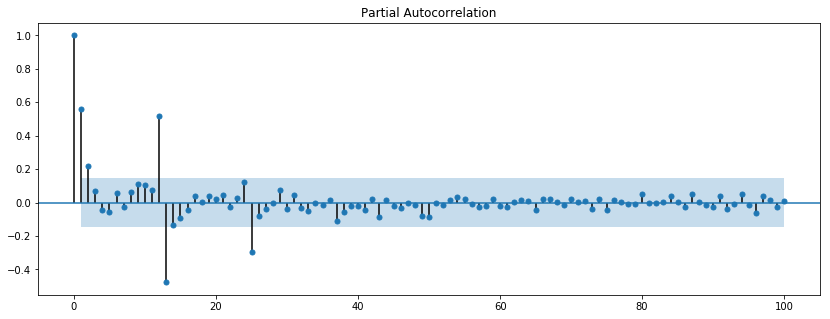

In [68]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(diet, lags = 100);

The partial autocorrelation function can be interpreted as a regression of the series against its past lags. It helps you come up with a possible order for the auto regressive term. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant. The use of PACF will become more clear when we will be looking at some more "advanced" time series next!

Sidenote: There is also a function `plot_acf` in statsmodels, which serves as an alternative to Pandas' `autocorrelation_plot`:

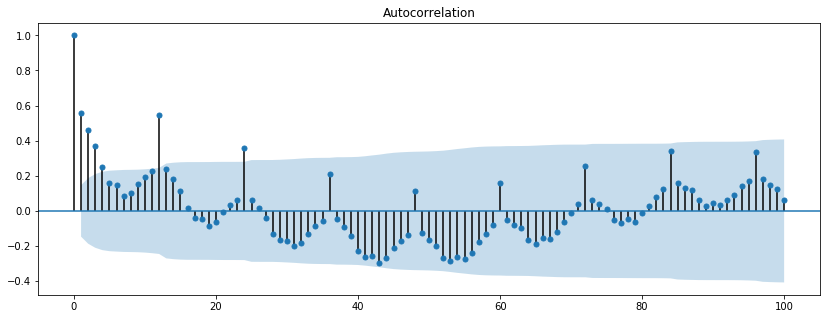

In [69]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_acf(diet, lags = 100);

Note that the plots (and especially the confidence bands) are slightly different. Feel free to have a loot at [this stackoverflow post](https://stackoverflow.com/questions/36038927/whats-the-difference-between-pandas-acf-and-statsmodel-acf) if you want to dig deeper.

## Addional reading

[This blogpost](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/) gives a great overview on what you've seen in this lesson! We'll learn about autoregression and moving average models later, so don't worry about this section too much yet!

## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's practice in the next lab!